# LAB 8 - TEXT CLUSTERING (TF-IDF)

## LOAD DATASET

In [1]:
#Import libraries
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from tabulate import tabulate
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
import string 

In [2]:
#Load the data
df = pd.read_csv('customer_complaints_1.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   author     19 non-null     object
 1   posted_on  19 non-null     object
 2   rating     19 non-null     int64 
 3   text       19 non-null     object
dtypes: int64(1), object(3)
memory usage: 740.0+ bytes


In [5]:
df

,author,posted_on,rating,text
0,"Alantae of Chesterfeild, MI","Nov. 22, 2016",1,I used to love Comcast. Until all these consta...
1,"Vera of Philadelphia, PA","Nov. 19, 2016",1,I'm so over Comcast! The worst internet provid...
2,"Sarah of Rancho Cordova, CA","Nov. 17, 2016",1,If I could give them a negative star or no sta...
3,"Dennis of Manchester, NH","Nov. 16, 2016",1,I've had the worst experiences so far since in...
4,"Ryan of Bellevue, WA","Nov. 14, 2016",1,Check your contract when you sign up for Comca...
5,"Terri of Mobile, AL","Nov. 9, 2016",1,Thank God. I am changing to Dish. They gave me...
6,"Kellie of Salt Lake City, UT","Nov. 9, 2016",1,I Have been a long time customer and only have...
7,"Kathleen of New Haven, CT","Nov. 6, 2016",2,There is a malfunction on the DVR manager whic...
8,"Shira of Bloomfield, NJ","Nov. 5, 2016",1,Charges overwhelming. Comcast service rep was ...
9,"Kristy of Alpharetta, GA","Nov. 2, 2016",1,"I have had cable, DISH, and U-verse, etc. in t..."


# PREPROCESSING

## remove punctuation

In [6]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [7]:
def remove_punctuation(text):
    punctuation_free = ""
    
    for i in text:
        if i not in string.punctuation:
            punctuation_free += i
            
    return punctuation_free

In [9]:
columns_to_drop = df.columns[df.columns != 'text']
df.drop(columns=columns_to_drop, inplace=True)

In [10]:
df['Clean_Punctuation'] = df['text'].apply(remove_punctuation)
df

,text,Clean_Punctuation
0,I used to love Comcast. Until all these consta...,I used to love Comcast Until all these constan...
1,I'm so over Comcast! The worst internet provid...,Im so over Comcast The worst internet provider...
2,If I could give them a negative star or no sta...,If I could give them a negative star or no sta...
3,I've had the worst experiences so far since in...,Ive had the worst experiences so far since ins...
4,Check your contract when you sign up for Comca...,Check your contract when you sign up for Comca...
5,Thank God. I am changing to Dish. They gave me...,Thank God I am changing to Dish They gave me a...
6,I Have been a long time customer and only have...,I Have been a long time customer and only have...
7,There is a malfunction on the DVR manager whic...,There is a malfunction on the DVR manager whic...
8,Charges overwhelming. Comcast service rep was ...,Charges overwhelming Comcast service rep was s...
9,"I have had cable, DISH, and U-verse, etc. in t...",I have had cable DISH and Uverse etc in the pa...


## convert to lower case

In [11]:
df['Clean_Lower'] = df['Clean_Punctuation'].str.lower()
df

,text,Clean_Punctuation,Clean_Lower
0,I used to love Comcast. Until all these consta...,I used to love Comcast Until all these constan...,i used to love comcast until all these constan...
1,I'm so over Comcast! The worst internet provid...,Im so over Comcast The worst internet provider...,im so over comcast the worst internet provider...
2,If I could give them a negative star or no sta...,If I could give them a negative star or no sta...,if i could give them a negative star or no sta...
3,I've had the worst experiences so far since in...,Ive had the worst experiences so far since ins...,ive had the worst experiences so far since ins...
4,Check your contract when you sign up for Comca...,Check your contract when you sign up for Comca...,check your contract when you sign up for comca...
5,Thank God. I am changing to Dish. They gave me...,Thank God I am changing to Dish They gave me a...,thank god i am changing to dish they gave me a...
6,I Have been a long time customer and only have...,I Have been a long time customer and only have...,i have been a long time customer and only have...
7,There is a malfunction on the DVR manager whic...,There is a malfunction on the DVR manager whic...,there is a malfunction on the dvr manager whic...
8,Charges overwhelming. Comcast service rep was ...,Charges overwhelming Comcast service rep was s...,charges overwhelming comcast service rep was s...
9,"I have had cable, DISH, and U-verse, etc. in t...",I have had cable DISH and Uverse etc in the pa...,i have had cable dish and uverse etc in the pa...


## remove numbers and dash (-)

In [12]:
def remove_numbers(text):
        return re.sub("[\d-]",'',text)
    
df['Clean_Number'] = df['Clean_Lower'].apply(remove_numbers)
df

,text,Clean_Punctuation,Clean_Lower,Clean_Number
0,I used to love Comcast. Until all these consta...,I used to love Comcast Until all these constan...,i used to love comcast until all these constan...,i used to love comcast until all these constan...
1,I'm so over Comcast! The worst internet provid...,Im so over Comcast The worst internet provider...,im so over comcast the worst internet provider...,im so over comcast the worst internet provider...
2,If I could give them a negative star or no sta...,If I could give them a negative star or no sta...,if i could give them a negative star or no sta...,if i could give them a negative star or no sta...
3,I've had the worst experiences so far since in...,Ive had the worst experiences so far since ins...,ive had the worst experiences so far since ins...,ive had the worst experiences so far since ins...
4,Check your contract when you sign up for Comca...,Check your contract when you sign up for Comca...,check your contract when you sign up for comca...,check your contract when you sign up for comca...
5,Thank God. I am changing to Dish. They gave me...,Thank God I am changing to Dish They gave me a...,thank god i am changing to dish they gave me a...,thank god i am changing to dish they gave me a...
6,I Have been a long time customer and only have...,I Have been a long time customer and only have...,i have been a long time customer and only have...,i have been a long time customer and only have...
7,There is a malfunction on the DVR manager whic...,There is a malfunction on the DVR manager whic...,there is a malfunction on the dvr manager whic...,there is a malfunction on the dvr manager whic...
8,Charges overwhelming. Comcast service rep was ...,Charges overwhelming Comcast service rep was s...,charges overwhelming comcast service rep was s...,charges overwhelming comcast service rep was s...
9,"I have had cable, DISH, and U-verse, etc. in t...",I have had cable DISH and Uverse etc in the pa...,i have had cable dish and uverse etc in the pa...,i have had cable dish and uverse etc in the pa...


## tokenize data

In [13]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

df['Tokenize_Data'] = df['Clean_Number'].apply(word_tokenize)
df

[nltk_data] Downloading package punkt to C:\Users\End
[nltk_data]     User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,text,Clean_Punctuation,Clean_Lower,Clean_Number,Tokenize_Data
0,I used to love Comcast. Until all these consta...,I used to love Comcast Until all these constan...,i used to love comcast until all these constan...,i used to love comcast until all these constan...,"[i, used, to, love, comcast, until, all, these..."
1,I'm so over Comcast! The worst internet provid...,Im so over Comcast The worst internet provider...,im so over comcast the worst internet provider...,im so over comcast the worst internet provider...,"[im, so, over, comcast, the, worst, internet, ..."
2,If I could give them a negative star or no sta...,If I could give them a negative star or no sta...,if i could give them a negative star or no sta...,if i could give them a negative star or no sta...,"[if, i, could, give, them, a, negative, star, ..."
3,I've had the worst experiences so far since in...,Ive had the worst experiences so far since ins...,ive had the worst experiences so far since ins...,ive had the worst experiences so far since ins...,"[ive, had, the, worst, experiences, so, far, s..."
4,Check your contract when you sign up for Comca...,Check your contract when you sign up for Comca...,check your contract when you sign up for comca...,check your contract when you sign up for comca...,"[check, your, contract, when, you, sign, up, f..."
5,Thank God. I am changing to Dish. They gave me...,Thank God I am changing to Dish They gave me a...,thank god i am changing to dish they gave me a...,thank god i am changing to dish they gave me a...,"[thank, god, i, am, changing, to, dish, they, ..."
6,I Have been a long time customer and only have...,I Have been a long time customer and only have...,i have been a long time customer and only have...,i have been a long time customer and only have...,"[i, have, been, a, long, time, customer, and, ..."
7,There is a malfunction on the DVR manager whic...,There is a malfunction on the DVR manager whic...,there is a malfunction on the dvr manager whic...,there is a malfunction on the dvr manager whic...,"[there, is, a, malfunction, on, the, dvr, mana..."
8,Charges overwhelming. Comcast service rep was ...,Charges overwhelming Comcast service rep was s...,charges overwhelming comcast service rep was s...,charges overwhelming comcast service rep was s...,"[charges, overwhelming, comcast, service, rep,..."
9,"I have had cable, DISH, and U-verse, etc. in t...",I have had cable DISH and Uverse etc in the pa...,i have had cable dish and uverse etc in the pa...,i have had cable dish and uverse etc in the pa...,"[i, have, had, cable, dish, and, uverse, etc, ..."


## remove stopwords

In [14]:
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')

def remove_stopwords(text):
    output = []
    for i in text:
        if i not in stopwords:
            output.append(i)
    return output

df['Clean_Stopwords'] = df['Tokenize_Data'].apply(remove_stopwords)
df

[nltk_data] Downloading package stopwords to C:\Users\End
[nltk_data]     User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,text,Clean_Punctuation,Clean_Lower,Clean_Number,Tokenize_Data,Clean_Stopwords
0,I used to love Comcast. Until all these consta...,I used to love Comcast Until all these constan...,i used to love comcast until all these constan...,i used to love comcast until all these constan...,"[i, used, to, love, comcast, until, all, these...","[used, love, comcast, constant, updates, inter..."
1,I'm so over Comcast! The worst internet provid...,Im so over Comcast The worst internet provider...,im so over comcast the worst internet provider...,im so over comcast the worst internet provider...,"[im, so, over, comcast, the, worst, internet, ...","[im, comcast, worst, internet, provider, im, t..."
2,If I could give them a negative star or no sta...,If I could give them a negative star or no sta...,if i could give them a negative star or no sta...,if i could give them a negative star or no sta...,"[if, i, could, give, them, a, negative, star, ...","[could, give, negative, star, stars, review, w..."
3,I've had the worst experiences so far since in...,Ive had the worst experiences so far since ins...,ive had the worst experiences so far since ins...,ive had the worst experiences so far since ins...,"[ive, had, the, worst, experiences, so, far, s...","[ive, worst, experiences, far, since, install,..."
4,Check your contract when you sign up for Comca...,Check your contract when you sign up for Comca...,check your contract when you sign up for comca...,check your contract when you sign up for comca...,"[check, your, contract, when, you, sign, up, f...","[check, contract, sign, comcast, advertised, o..."
5,Thank God. I am changing to Dish. They gave me...,Thank God I am changing to Dish They gave me a...,thank god i am changing to dish they gave me a...,thank god i am changing to dish they gave me a...,"[thank, god, i, am, changing, to, dish, they, ...","[thank, god, changing, dish, gave, awesome, pr..."
6,I Have been a long time customer and only have...,I Have been a long time customer and only have...,i have been a long time customer and only have...,i have been a long time customer and only have...,"[i, have, been, a, long, time, customer, and, ...","[long, time, customer, xfinity, isp, local, wa..."
7,There is a malfunction on the DVR manager whic...,There is a malfunction on the DVR manager whic...,there is a malfunction on the dvr manager whic...,there is a malfunction on the dvr manager whic...,"[there, is, a, malfunction, on, the, dvr, mana...","[malfunction, dvr, manager, preventing, us, ad..."
8,Charges overwhelming. Comcast service rep was ...,Charges overwhelming Comcast service rep was s...,charges overwhelming comcast service rep was s...,charges overwhelming comcast service rep was s...,"[charges, overwhelming, comcast, service, rep,...","[charges, overwhelming, comcast, service, rep,..."
9,"I have had cable, DISH, and U-verse, etc. in t...",I have had cable DISH and Uverse etc in the pa...,i have had cable dish and uverse etc in the pa...,i have had cable dish and uverse etc in the pa...,"[i, have, had, cable, dish, and, uverse, etc, ...","[cable, dish, uverse, etc, past, eh, know, com..."


## stemming

In [15]:
from nltk.stem.porter import PorterStemmer
porter_stemmer = PorterStemmer()

def stemming(text):
    stem_text = []
    for word in text:
        stemmed_word = porter_stemmer.stem(word)
        stem_text.append(stemmed_word)
    return stem_text

df['Clean_StemmedWord'] = df['Clean_Stopwords'].apply(stemming)
df

,text,Clean_Punctuation,Clean_Lower,Clean_Number,Tokenize_Data,Clean_Stopwords,Clean_StemmedWord
0,I used to love Comcast. Until all these consta...,I used to love Comcast Until all these constan...,i used to love comcast until all these constan...,i used to love comcast until all these constan...,"[i, used, to, love, comcast, until, all, these...","[used, love, comcast, constant, updates, inter...","[use, love, comcast, constant, updat, internet..."
1,I'm so over Comcast! The worst internet provid...,Im so over Comcast The worst internet provider...,im so over comcast the worst internet provider...,im so over comcast the worst internet provider...,"[im, so, over, comcast, the, worst, internet, ...","[im, comcast, worst, internet, provider, im, t...","[im, comcast, worst, internet, provid, im, tak..."
2,If I could give them a negative star or no sta...,If I could give them a negative star or no sta...,if i could give them a negative star or no sta...,if i could give them a negative star or no sta...,"[if, i, could, give, them, a, negative, star, ...","[could, give, negative, star, stars, review, w...","[could, give, neg, star, star, review, would, ..."
3,I've had the worst experiences so far since in...,Ive had the worst experiences so far since ins...,ive had the worst experiences so far since ins...,ive had the worst experiences so far since ins...,"[ive, had, the, worst, experiences, so, far, s...","[ive, worst, experiences, far, since, install,...","[ive, worst, experi, far, sinc, instal, noth, ..."
4,Check your contract when you sign up for Comca...,Check your contract when you sign up for Comca...,check your contract when you sign up for comca...,check your contract when you sign up for comca...,"[check, your, contract, when, you, sign, up, f...","[check, contract, sign, comcast, advertised, o...","[check, contract, sign, comcast, advertis, off..."
5,Thank God. I am changing to Dish. They gave me...,Thank God I am changing to Dish They gave me a...,thank god i am changing to dish they gave me a...,thank god i am changing to dish they gave me a...,"[thank, god, i, am, changing, to, dish, they, ...","[thank, god, changing, dish, gave, awesome, pr...","[thank, god, chang, dish, gave, awesom, price,..."
6,I Have been a long time customer and only have...,I Have been a long time customer and only have...,i have been a long time customer and only have...,i have been a long time customer and only have...,"[i, have, been, a, long, time, customer, and, ...","[long, time, customer, xfinity, isp, local, wa...","[long, time, custom, xfiniti, isp, local, walm..."
7,There is a malfunction on the DVR manager whic...,There is a malfunction on the DVR manager whic...,there is a malfunction on the dvr manager whic...,there is a malfunction on the dvr manager whic...,"[there, is, a, malfunction, on, the, dvr, mana...","[malfunction, dvr, manager, preventing, us, ad...","[malfunct, dvr, manag, prevent, us, ad, record..."
8,Charges overwhelming. Comcast service rep was ...,Charges overwhelming Comcast service rep was s...,charges overwhelming comcast service rep was s...,charges overwhelming comcast service rep was s...,"[charges, overwhelming, comcast, service, rep,...","[charges, overwhelming, comcast, service, rep,...","[charg, overwhelm, comcast, servic, rep, ignor..."
9,"I have had cable, DISH, and U-verse, etc. in t...",I have had cable DISH and Uverse etc in the pa...,i have had cable dish and uverse etc in the pa...,i have had cable dish and uverse etc in the pa...,"[i, have, had, cable, dish, and, uverse, etc, ...","[cable, dish, uverse, etc, past, eh, know, com...","[cabl, dish, uvers, etc, past, eh, know, comca..."


## lemmatization

In [16]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatizer(text):
    lemm_text = []
    for word in text:
        lemmatized_word = wordnet_lemmatizer.lemmatize(word)
        lemm_text.append(lemmatized_word)
    return lemm_text

df['Clean_LemmatizedWord'] = df['Clean_StemmedWord'].apply(lemmatizer)
df

[nltk_data] Downloading package wordnet to C:\Users\End
[nltk_data]     User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,text,Clean_Punctuation,Clean_Lower,Clean_Number,Tokenize_Data,Clean_Stopwords,Clean_StemmedWord,Clean_LemmatizedWord
0,I used to love Comcast. Until all these consta...,I used to love Comcast Until all these constan...,i used to love comcast until all these constan...,i used to love comcast until all these constan...,"[i, used, to, love, comcast, until, all, these...","[used, love, comcast, constant, updates, inter...","[use, love, comcast, constant, updat, internet...","[use, love, comcast, constant, updat, internet..."
1,I'm so over Comcast! The worst internet provid...,Im so over Comcast The worst internet provider...,im so over comcast the worst internet provider...,im so over comcast the worst internet provider...,"[im, so, over, comcast, the, worst, internet, ...","[im, comcast, worst, internet, provider, im, t...","[im, comcast, worst, internet, provid, im, tak...","[im, comcast, worst, internet, provid, im, tak..."
2,If I could give them a negative star or no sta...,If I could give them a negative star or no sta...,if i could give them a negative star or no sta...,if i could give them a negative star or no sta...,"[if, i, could, give, them, a, negative, star, ...","[could, give, negative, star, stars, review, w...","[could, give, neg, star, star, review, would, ...","[could, give, neg, star, star, review, would, ..."
3,I've had the worst experiences so far since in...,Ive had the worst experiences so far since ins...,ive had the worst experiences so far since ins...,ive had the worst experiences so far since ins...,"[ive, had, the, worst, experiences, so, far, s...","[ive, worst, experiences, far, since, install,...","[ive, worst, experi, far, sinc, instal, noth, ...","[ive, worst, experi, far, sinc, instal, noth, ..."
4,Check your contract when you sign up for Comca...,Check your contract when you sign up for Comca...,check your contract when you sign up for comca...,check your contract when you sign up for comca...,"[check, your, contract, when, you, sign, up, f...","[check, contract, sign, comcast, advertised, o...","[check, contract, sign, comcast, advertis, off...","[check, contract, sign, comcast, advertis, off..."
5,Thank God. I am changing to Dish. They gave me...,Thank God I am changing to Dish They gave me a...,thank god i am changing to dish they gave me a...,thank god i am changing to dish they gave me a...,"[thank, god, i, am, changing, to, dish, they, ...","[thank, god, changing, dish, gave, awesome, pr...","[thank, god, chang, dish, gave, awesom, price,...","[thank, god, chang, dish, gave, awesom, price,..."
6,I Have been a long time customer and only have...,I Have been a long time customer and only have...,i have been a long time customer and only have...,i have been a long time customer and only have...,"[i, have, been, a, long, time, customer, and, ...","[long, time, customer, xfinity, isp, local, wa...","[long, time, custom, xfiniti, isp, local, walm...","[long, time, custom, xfiniti, isp, local, walm..."
7,There is a malfunction on the DVR manager whic...,There is a malfunction on the DVR manager whic...,there is a malfunction on the dvr manager whic...,there is a malfunction on the dvr manager whic...,"[there, is, a, malfunction, on, the, dvr, mana...","[malfunction, dvr, manager, preventing, us, ad...","[malfunct, dvr, manag, prevent, us, ad, record...","[malfunct, dvr, manag, prevent, u, ad, record,..."
8,Charges overwhelming. Comcast service rep was ...,Charges overwhelming Comcast service rep was s...,charges overwhelming comcast service rep was s...,charges overwhelming comcast service rep was s...,"[charges, overwhelming, comcast, service, rep,...","[charges, overwhelming, comcast, service, rep,...","[charg, overwhelm, comcast, servic, rep, ignor...","[charg, overwhelm, comcast, servic, rep, ignor..."
9,"I have had cable, DISH, and U-verse, etc. in t...",I have had cable DISH and Uverse etc in the pa...,i have had cable dish and uverse etc in the pa...,i have had cable dish and uverse etc i

# K-MEANS

In [19]:
#Vectorize the dataset
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['text'])

In [20]:
#Define the number of clusters
k = 3

In [21]:
#Create a k-means model and fit it to the data
km = KMeans(n_clusters=k)
km.fit(X)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [22]:
#Predict the clusters for each document
y_pred = km.predict(X)

In [24]:
#Display the document and its predicted cluster in a table
table_data = [["Document", "Predicted Cluster"]]
table_data.extend([[doc, cluster] for doc, cluster in zip(df['text'], y_pred)])
print(tabulate(table_data, headers="firstrow"))

Document                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [25]:
#Print top terms per cluster
print("\nTop terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
for i in range(k):
    print("Cluster %d:" % i)
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])
    print()


Top terms per cluster:
Cluster 0:
 second
 boxes
 floor
 possible
 account
 adding
 the
 not
 to
 no

Cluster 1:
 the
 to
 and
 for
 it
 you
 they
 internet
 that
 my

Cluster 2:
 the
 service
 my
 is
 was
 am
 rep
 customer
 to
 that



In [26]:
#Calculate purity
total_samples = len(y_pred)
cluster_label_counts = [Counter(y_pred)]
purity = sum(max(cluster.values()) for cluster in cluster_label_counts) / total_samples

print("Purity:", purity)

Purity: 0.7894736842105263


IndexError: list index out of range

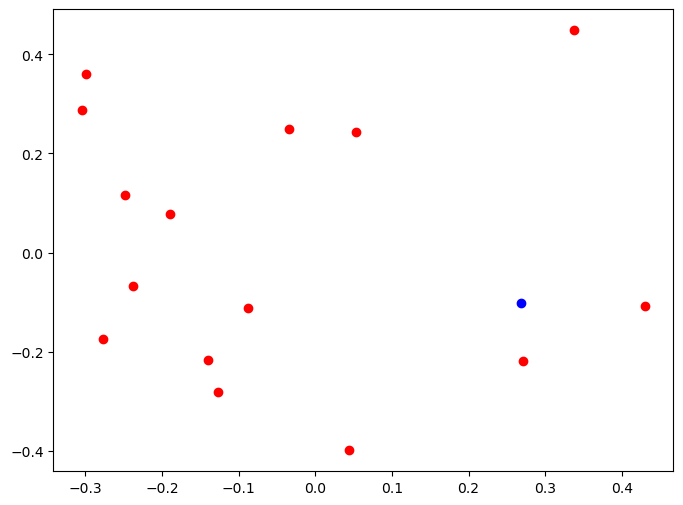

In [27]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
#Reduce dimensionality using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

#Plot the predicted clusters
plt.figure(figsize=(8, 6))
colors = ['blue', 'red']
for i in range(k):
    plt.scatter(X_pca[y_pred == i, 0], X_pca[y_pred == i, 1], c=colors[i], label=f'Cluster {i}')
plt.title('Predicted Clusters Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()